<a href="https://colab.research.google.com/github/sinchan-s/time-series-analysis/blob/main/tsa-kats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries for TSA using Kats

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Passengers data for TSA

In [ ]:
df = pd.read_csv("https://github.com/sinchan-s/time-series-analysis/raw/main/airline_passengers.csv")

### Droping NA values

In [ ]:
df.dropna(axis=0, inplace=True)
df.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


### Changing date column dtype: `object` to `datetime`

In [ ]:
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


## Dataframe columns reformatting

In [ ]:
from kats.consts import TimeSeriesData
from kats.models.prophet import ProphetModel, ProphetParams
df.columns = ['month','#Passengers']
df['month'] = pd.to_datetime(df['month'],infer_datetime_format=True,format='%y%m')
df_s = TimeSeriesData(time=df['month'], value=df['#Passengers'])
df_s

,month,#Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


## Model instance creation, fitting & prediction

In [ ]:
# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative')
# create a prophet model instance
model = ProphetModel(df_s, params)
# fit model simply by calling m.fit()
model.fit()
# make prediction for next 30 month
forecast = model.predict(steps=30, freq="MS")
forecast.head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,time,fcst,fcst_lower,fcst_upper
0,1961-01-01,451.765190,438.448669,464.114172
1,1961-02-01,433.212698,420.450358,447.056235
2,1961-03-01,492.254622,478.546510,505.394592
3,1961-04-01,495.496541,481.976404,508.857249
4,1961-05-01,504.186375,489.898866,517.859081


## Prediction plotting

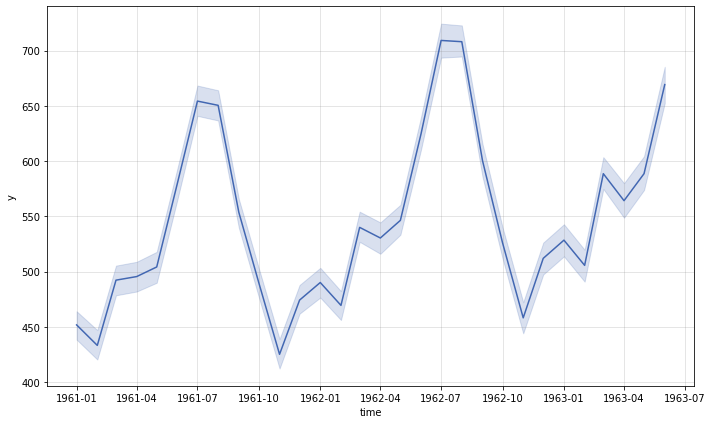

In [ ]:
model.plot()